# Практическое задание: Линейная регрессия и EDA

## Цель задания
В этом практическом задании вам предстоит выполнить полный анализ данных страховой компании, включая:
1. Разведочный анализ данных (EDA)
2. Визуализацию данных
3. Построение и оценку модели линейной регрессии

## Описание данных
Набор данных содержит информацию о страховых взносах и различных характеристиках клиентов:
- age: возраст
- sex: пол
- bmi: индекс массы тела
- children: количество детей
- smoker: статус курильщика
- region: регион проживания
- charges: страховые выплаты (целевая переменная)

## Задачи
1. Загрузка и первичный анализ данных
2. Очистка и предобработка данных
3. Разведочный анализ данных (EDA)
4. Статистический анализ
5. Подготовка признаков
6. Построение модели линейной регрессии
7. Оценка модели
8. Визуализация результатов

## Задание 1: Загрузка и первичный анализ данных

1. Загрузите библиотеки:
   - pandas для работы с данными
   - numpy для математических операций
   - matplotlib и seaborn для визуализации
   - scipy.stats для статистических тестов

2. Загрузите датасет 'insurance.csv'

3. Выполните первичный анализ данных:
   - Проверьте размерность данных
   - Выведите первые 5 строк
   - Проверьте типы данных
   - Проверьте наличие пропущенных значений
   - Выведите основные статистические характеристики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

data = pd.read_csv("insurance.csv")

print("=== Размерность данных (строки, столбцы) ===")
print(data.shape)

print("\n=== Первые 5 строк датасета ===")
print(data.head())

print("\n=== Типы данных ===")
print(data.dtypes)

print("\n=== Проверка на пропущенные значения ===")
print(data.isnull().sum())

print("\n=== Основные статистические характеристики числовых переменных ===")
print(data.describe())

=== Размерность данных (строки, столбцы) ===
(1338, 7)

=== Первые 5 строк датасета ===
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

=== Типы данных ===
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

=== Проверка на пропущенные значения ===
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

=== Основные статистические характеристики числовых переменных ===
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.20

## Задание 2: Очистка и предобработка данных

1. Проверьте данные на наличие выбросов:
   - Используйте boxplot для числовых переменных
   - Определите наличие выбросов с помощью IQR
   - Примите решение о методе обработки выбросов

2. Проверьте распределение категориальных переменных:
   - Подсчитайте количество уникальных значений
   - Постройте графики распределения

3. Проведите необходимую предобработку:
   - Обработайте выбросы (если необходимо)
   - Преобразуйте категориальные переменные
   - Сохраните предобработанные данные

=== Числовые переменные ===
['age', 'bmi', 'children', 'charges']


C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\1318541378.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


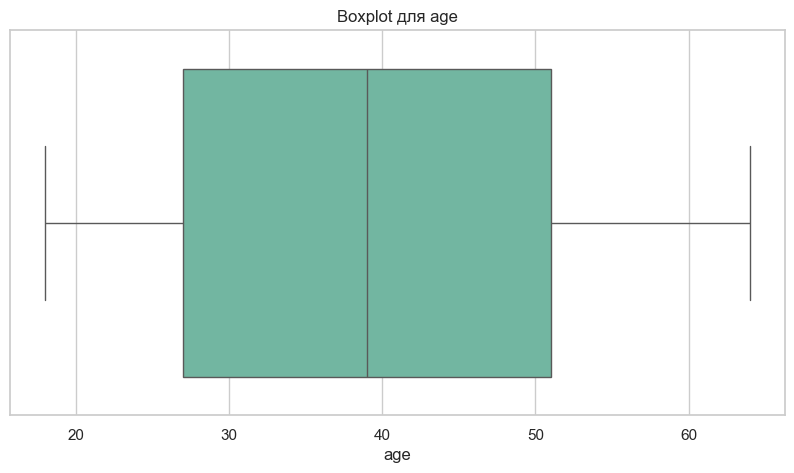

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\1318541378.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


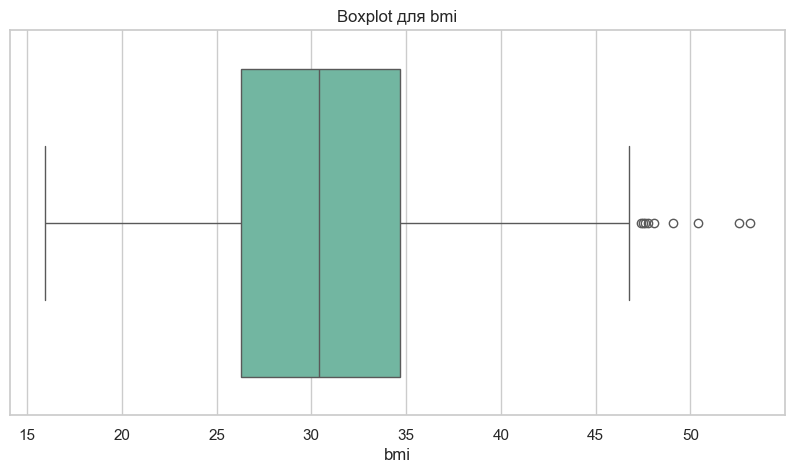

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\1318541378.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


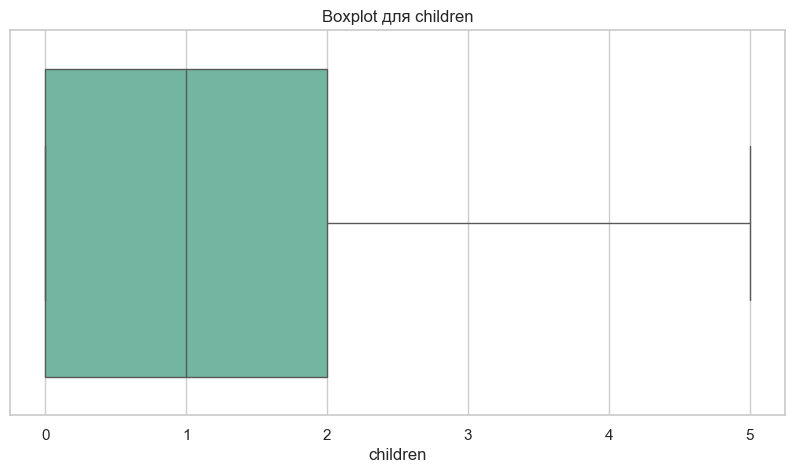

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\1318541378.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


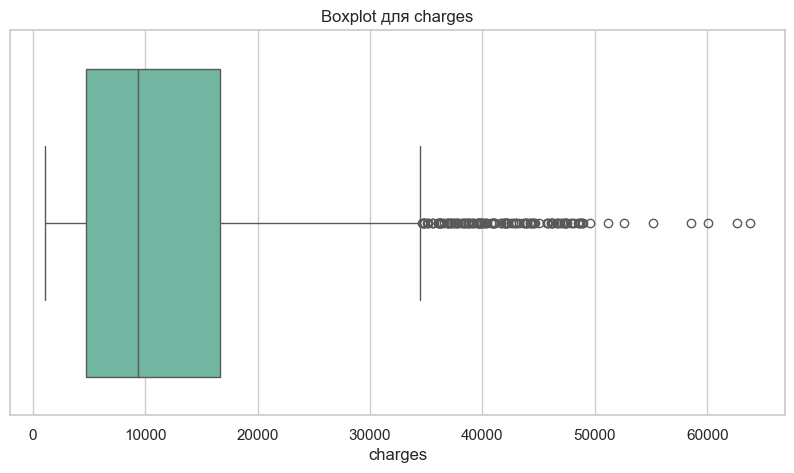

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\1318541378.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set3")



=== Анализ выбросов (IQR) ===
age: выбросов = 0 (границы: -9.00 — 87.00)
bmi: выбросов = 9 (границы: 13.70 — 47.29)
children: выбросов = 0 (границы: -3.00 — 5.00)
charges: выбросов = 139 (границы: -13109.15 — 34489.35)

Удалено выбросов по 'bmi': 9

=== Категориальные переменные ===

sex:
sex
male      670
female    659
Name: count, dtype: int64


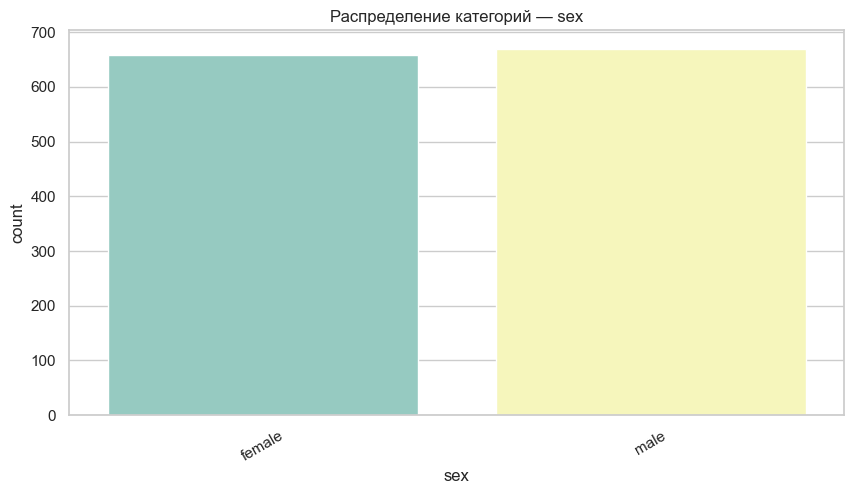

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\1318541378.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set3")



smoker:
smoker
no     1058
yes     271
Name: count, dtype: int64


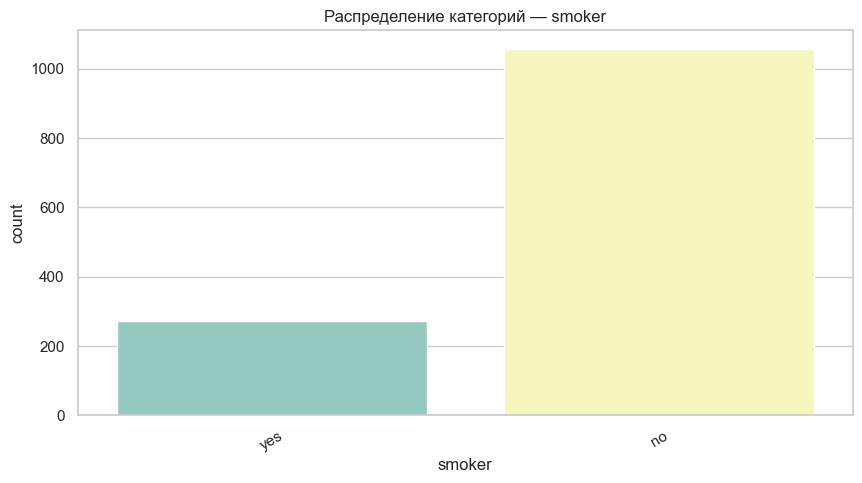


region:
region
southeast    357
northwest    325
southwest    324
northeast    323
Name: count, dtype: int64


C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\1318541378.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set3")


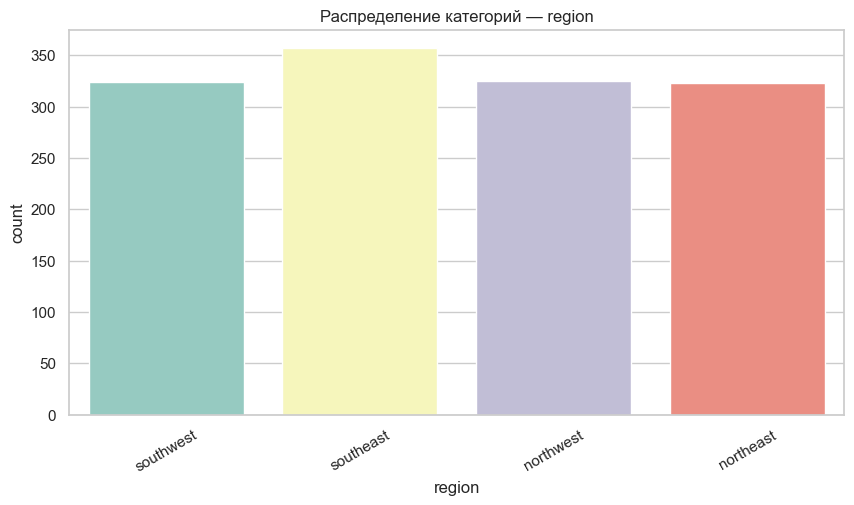


=== После кодирования (первые 5 строк) ===
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

✅ Предобработанные данные сохранены в 'insurance_preprocessed.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

numeric_cols = data.select_dtypes(include=[np.number]).columns

print("=== Числовые переменные ===")
print(list(numeric_cols))

for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=data, x=col, palette="Set2")
    plt.title(f"Boxplot для {col}")
    plt.show()

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

print("\n=== Анализ выбросов (IQR) ===")
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    print(f"{col}: выбросов = {len(outliers)} (границы: {lower:.2f} — {upper:.2f})")

bmi_outliers, _, _ = detect_outliers_iqr(data, 'bmi')
if len(bmi_outliers) > 0:
    data = data[~data.index.isin(bmi_outliers.index)]
    print(f"\nУдалено выбросов по 'bmi': {len(bmi_outliers)}")
else:
    print("\nВыбросы по 'bmi' отсутствуют — ничего не удаляем.")

categorical_cols = data.select_dtypes(include=['object']).columns

print("\n=== Категориальные переменные ===")
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())

    plt.figure()
    sns.countplot(data=data, x=col, palette="Set3")
    plt.title(f"Распределение категорий — {col}")
    plt.xticks(rotation=30)
    plt.show()

data_encoded = pd.get_dummies(data, drop_first=True)

print("\n=== После кодирования (первые 5 строк) ===")
print(data_encoded.head())

data_encoded.to_csv("insurance_preprocessed.csv", index=False)

## Задание 3: Разведочный анализ данных (EDA)

1. Выполните анализ распределений:
   - Постройте гистограммы для числовых переменных
   - Проверьте нормальность распределений с помощью QQ-plots
   - Визуализируйте распределения с помощью KDE plots

2. Исследуйте взаимосвязи между переменными:
   - Постройте корреляционную матрицу
   - Создайте scatter plots для пар числовых переменных
   - Проанализируйте взаимосвязи с помощью box plots для категориальных переменных

3. Проведите анализ целевой переменной (charges):
   - Исследуйте её распределение
   - Проанализируйте зависимости с другими переменными
   - Проверьте наличие нелинейных связей

=== Числовые переменные ===
['age', 'bmi', 'children', 'charges']


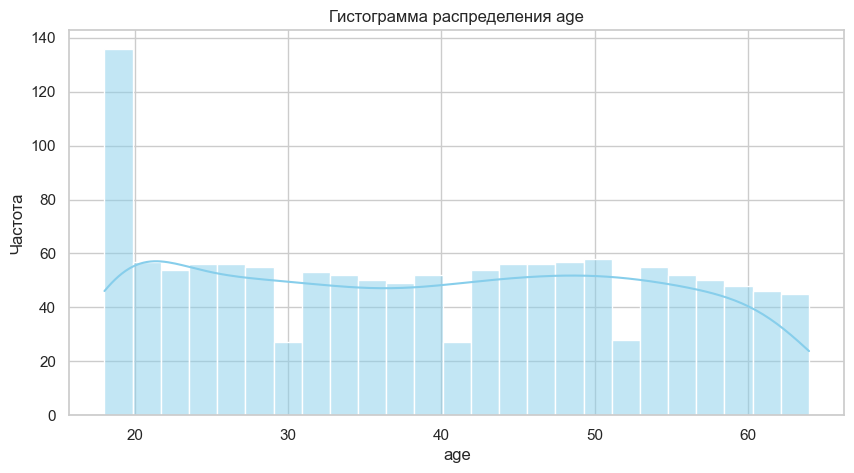

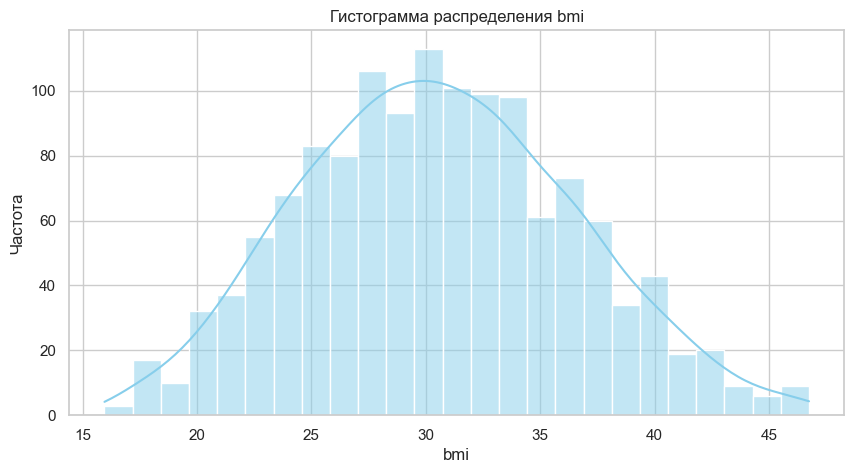

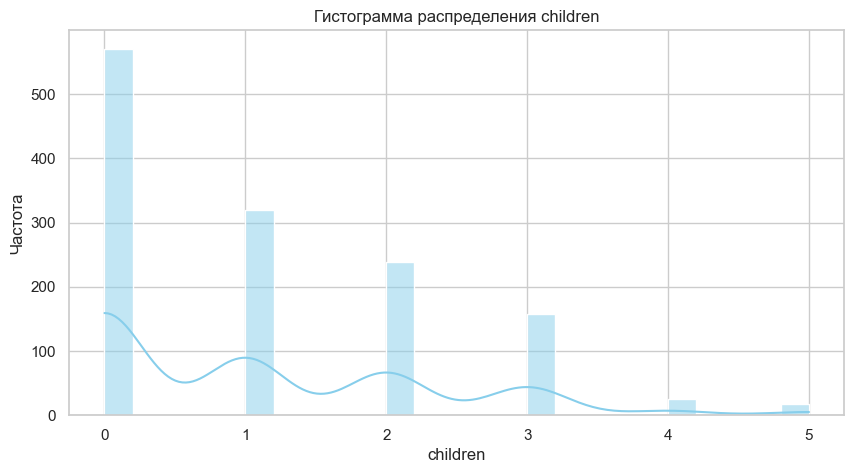

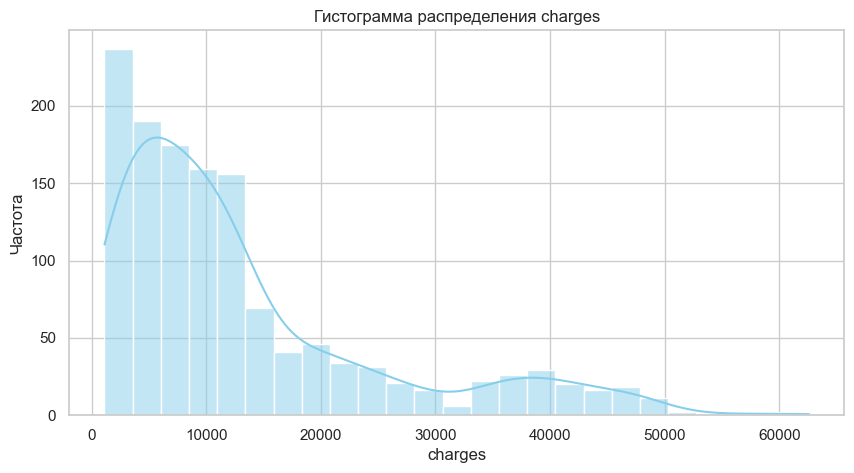

<Figure size 1000x500 with 0 Axes>

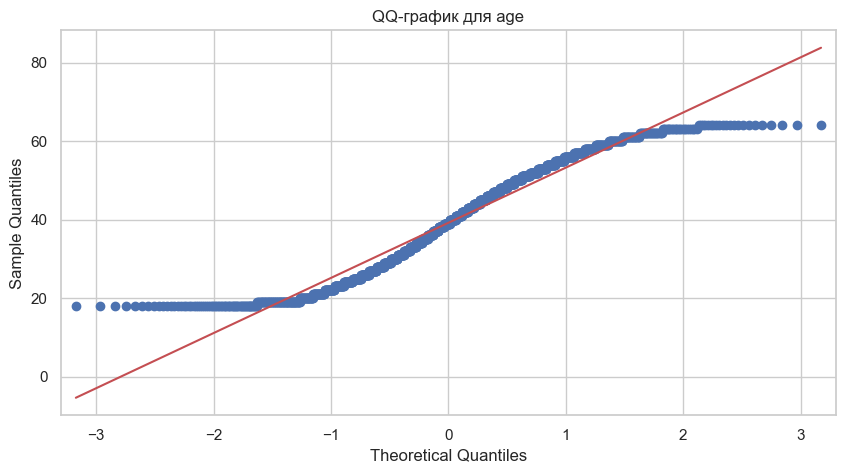

<Figure size 1000x500 with 0 Axes>

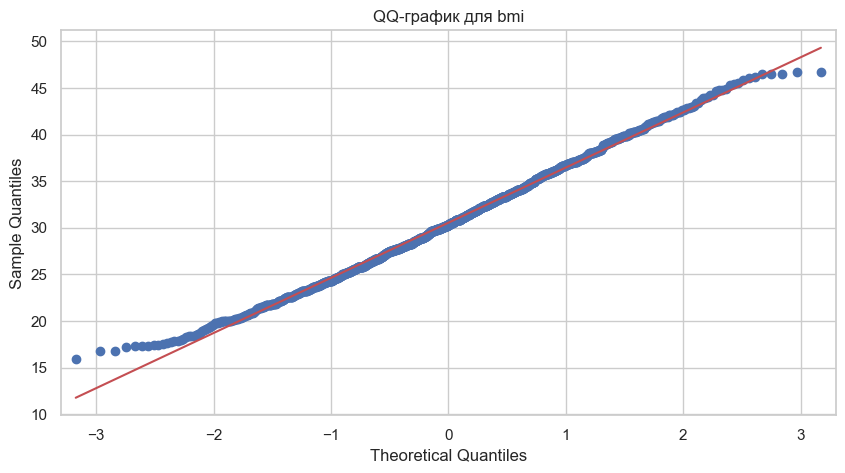

<Figure size 1000x500 with 0 Axes>

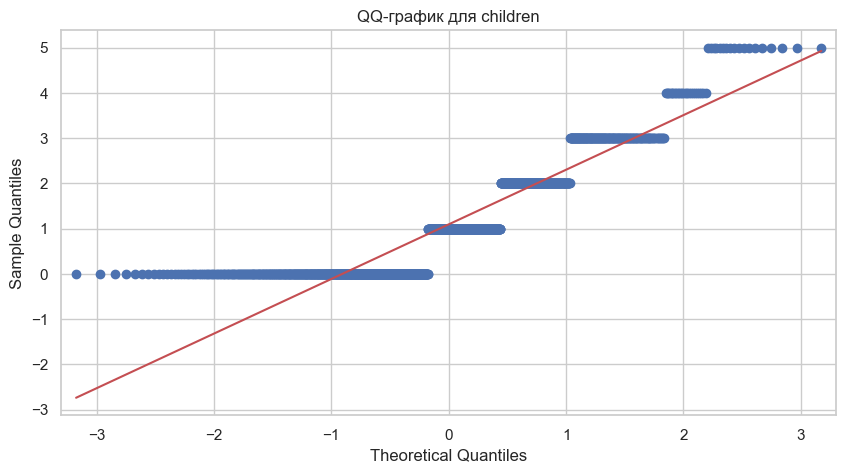

<Figure size 1000x500 with 0 Axes>

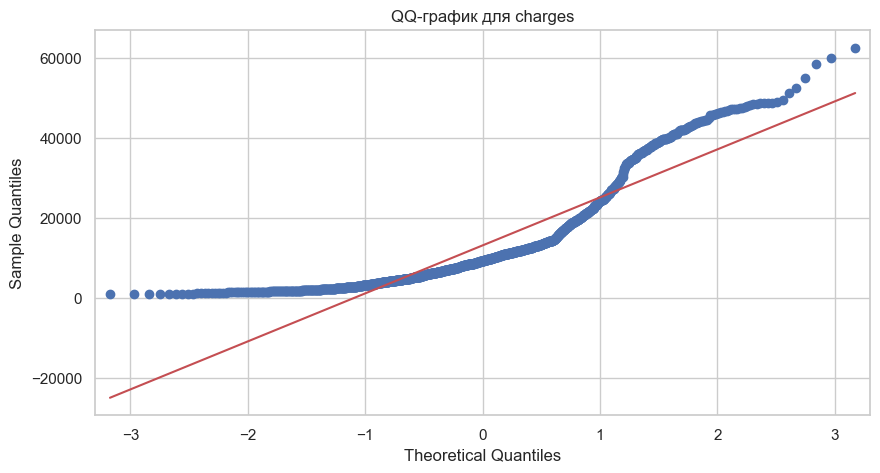

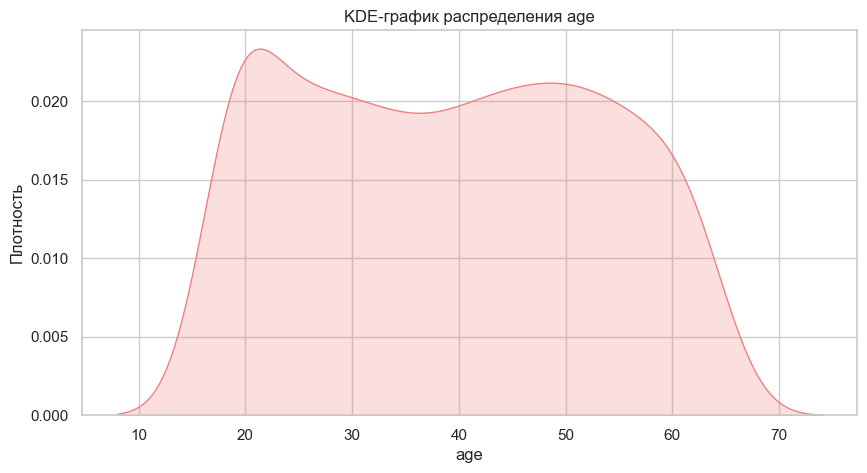

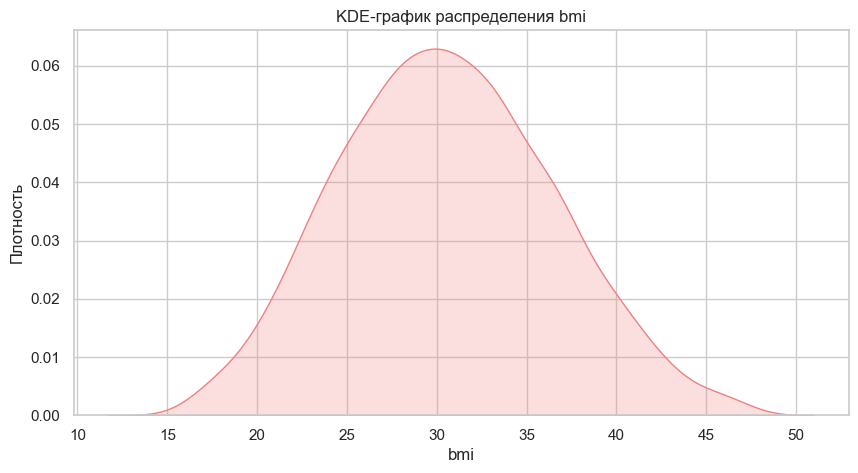

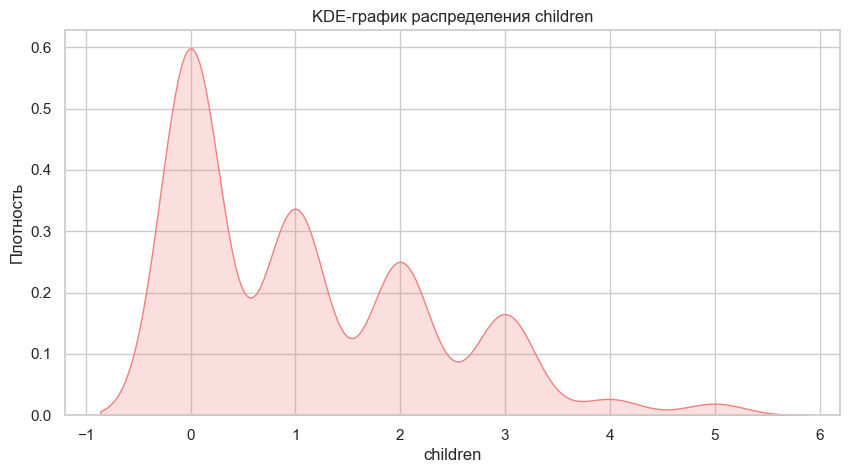

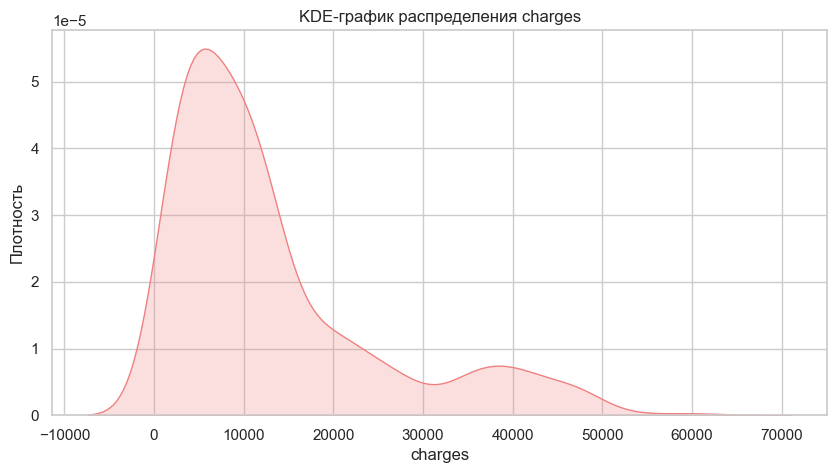

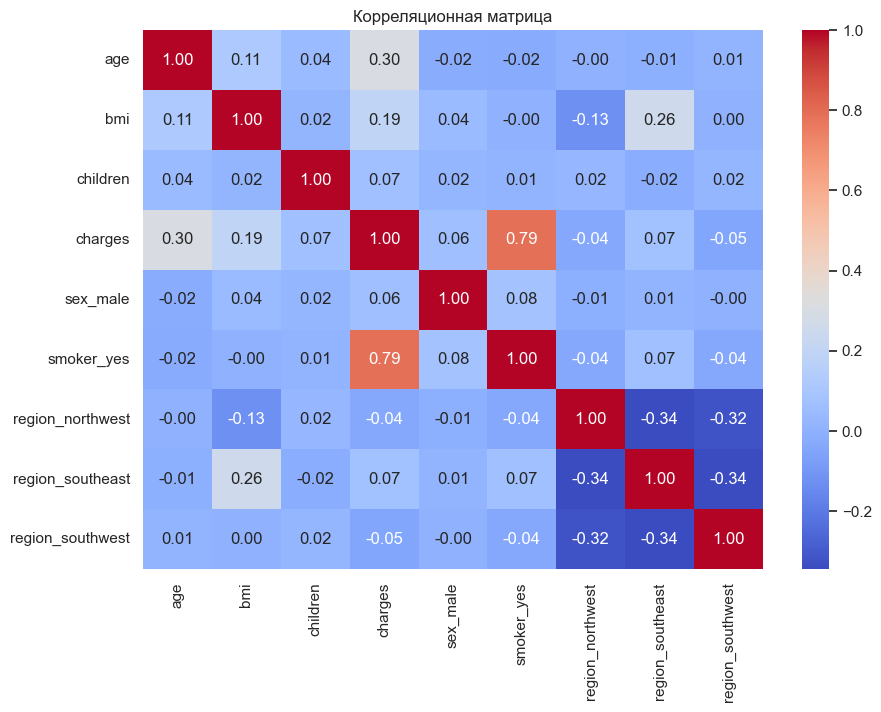

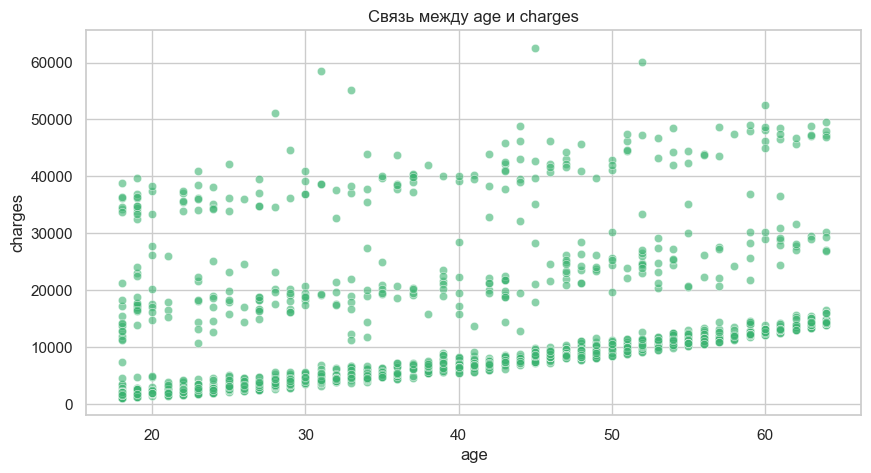

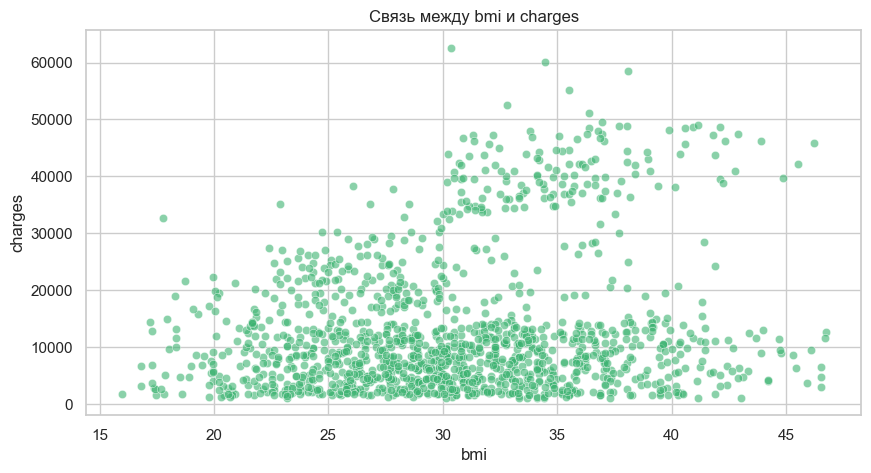

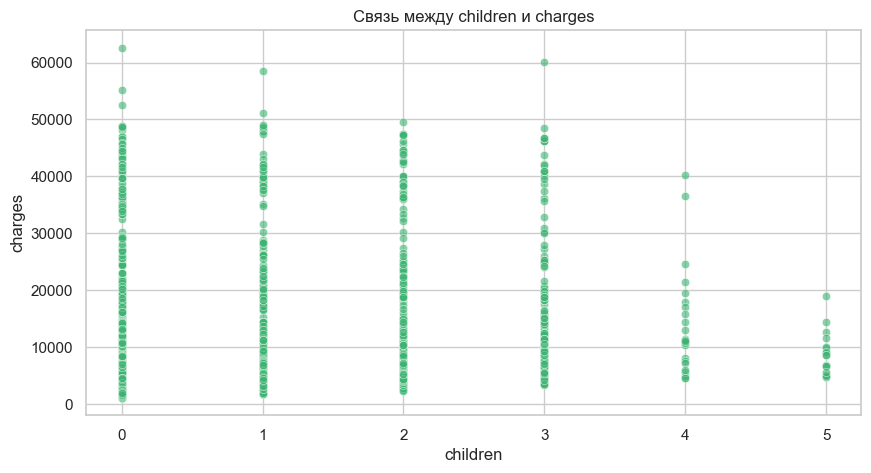

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\538862324.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='charges', palette='Set2')


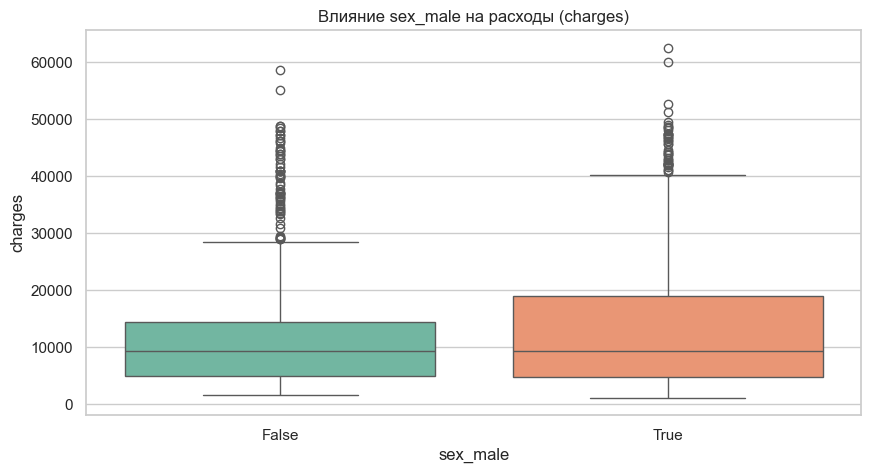

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\538862324.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='charges', palette='Set2')


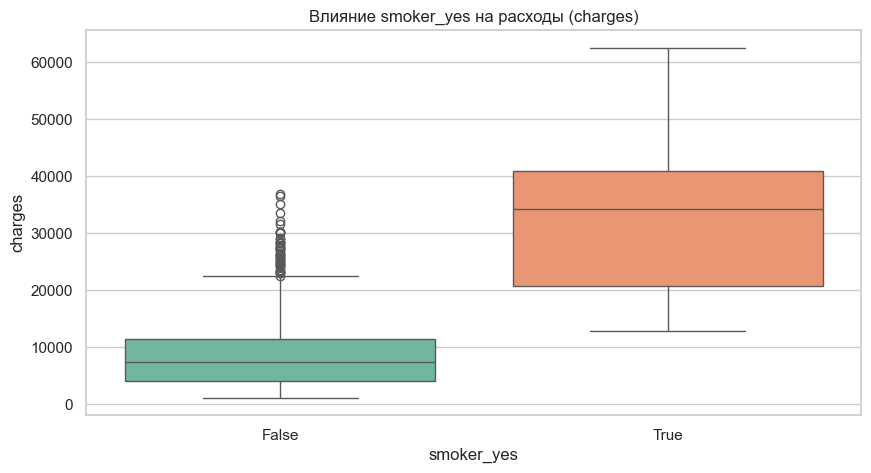

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\538862324.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='charges', palette='Set2')


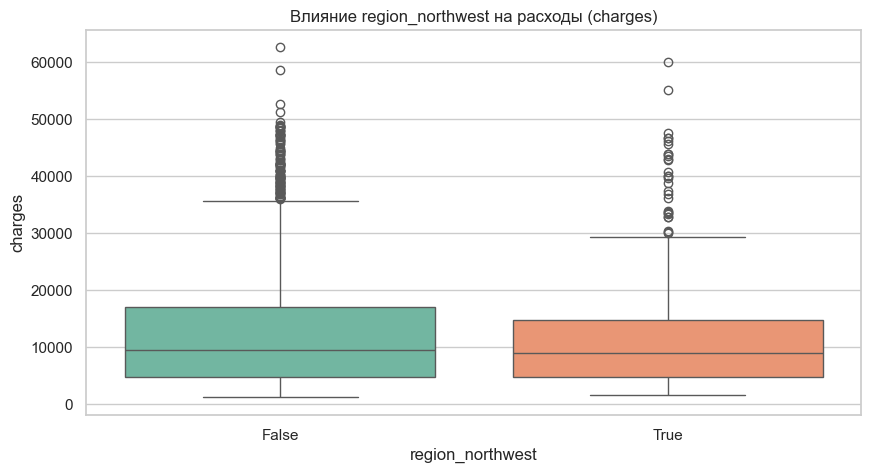

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\538862324.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='charges', palette='Set2')


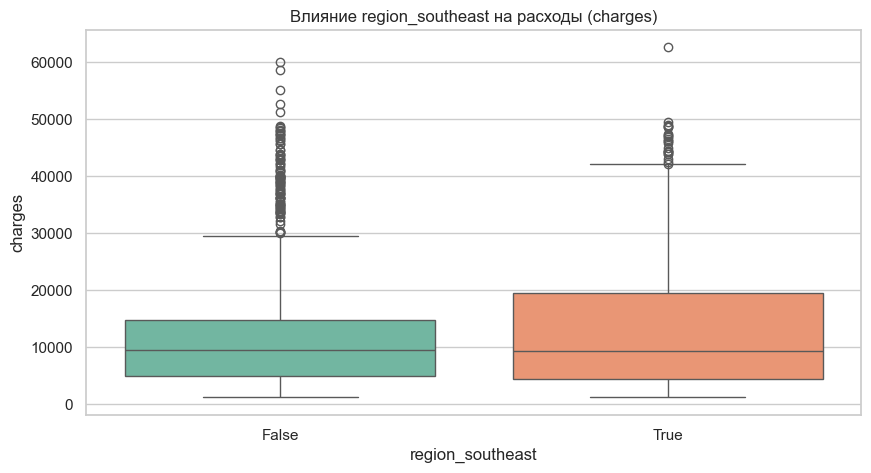

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\538862324.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='charges', palette='Set2')


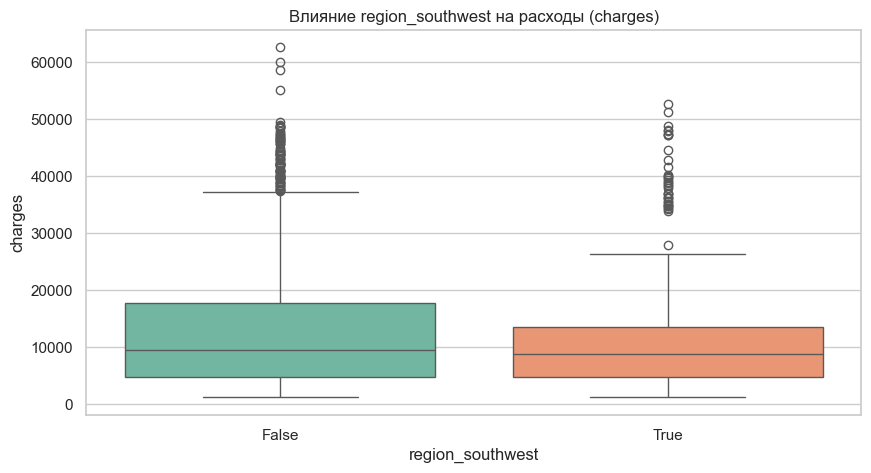

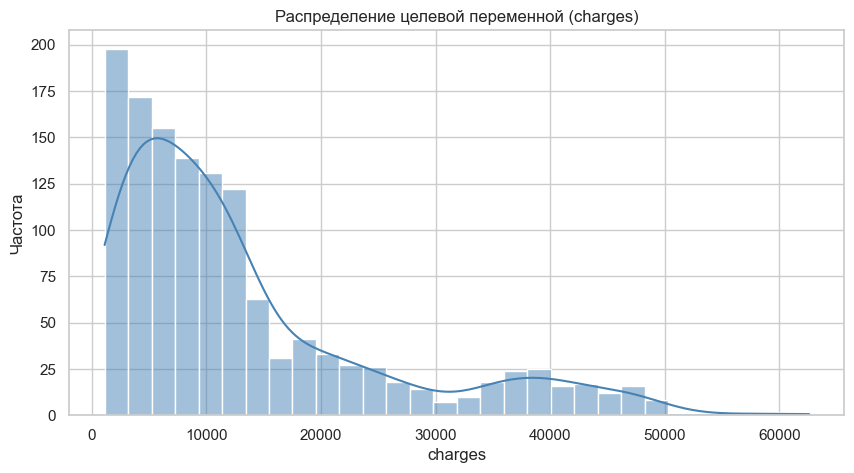

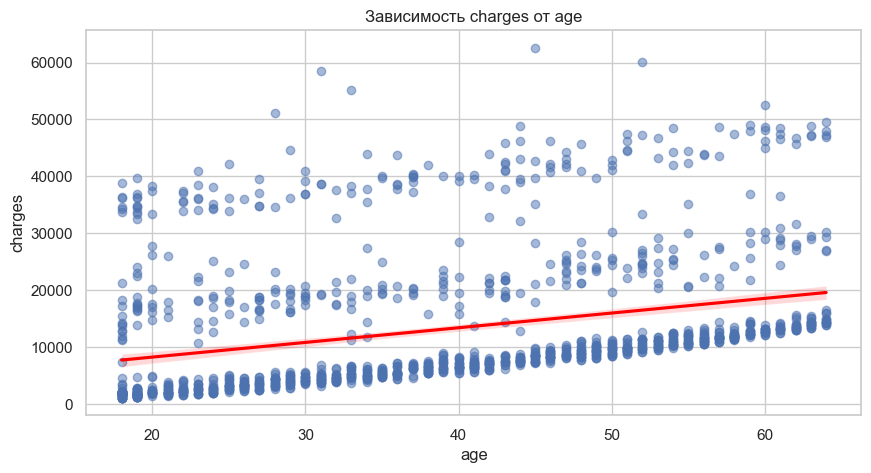

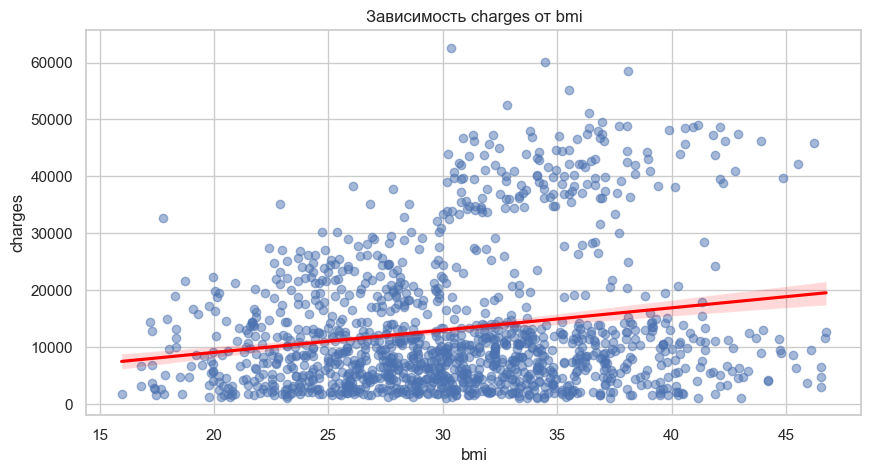

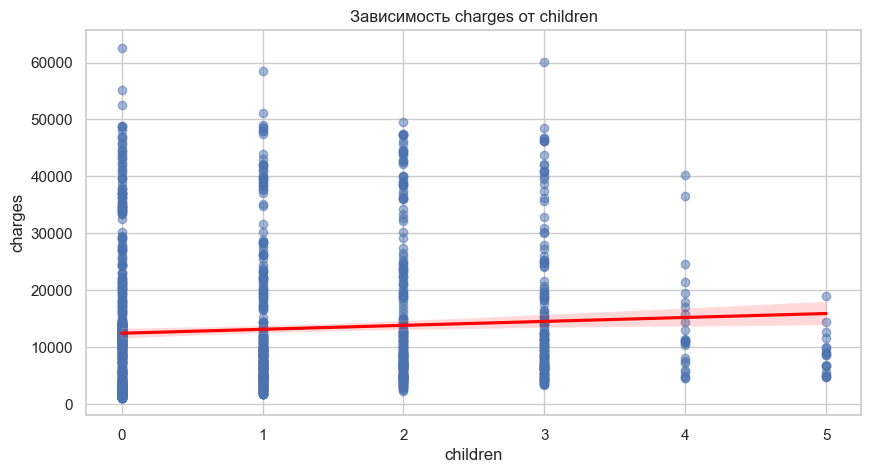


=== Корреляция Спирмена с переменной charges ===
charges             1.000000
smoker_yes          0.661815
age                 0.535391
children            0.133661
bmi                 0.118551
region_southeast    0.017766
sex_male            0.013204
region_northwest   -0.020881
region_southwest   -0.044655
Name: charges, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

data = pd.read_csv("insurance_preprocessed.csv")

numeric_cols = data.select_dtypes(include=[np.number]).columns

print("=== Числовые переменные ===")
print(list(numeric_cols))

for col in numeric_cols:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=25, color='skyblue')
    plt.title(f'Гистограмма распределения {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

import statsmodels.api as sm

for col in numeric_cols:
    plt.figure()
    sm.qqplot(data[col], line='s')
    plt.title(f'QQ-график для {col}')
    plt.show()

for col in numeric_cols:
    plt.figure()
    sns.kdeplot(data[col], fill=True, color='lightcoral')
    plt.title(f'KDE-график распределения {col}')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.show()

corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

pairs = [('age', 'charges'), ('bmi', 'charges'), ('children', 'charges')]
for x, y in pairs:
    plt.figure()
    sns.scatterplot(data=data, x=x, y=y, alpha=0.6, color='mediumseagreen')
    plt.title(f'Связь между {x} и {y}')
    plt.show()

cat_cols = [col for col in data.columns if data[col].nunique() <= 5 and col not in numeric_cols]
for col in cat_cols:
    plt.figure()
    sns.boxplot(data=data, x=col, y='charges', palette='Set2')
    plt.title(f'Влияние {col} на расходы (charges)')
    plt.show()

plt.figure()
sns.histplot(data['charges'], kde=True, bins=30, color='steelblue')
plt.title('Распределение целевой переменной (charges)')
plt.xlabel('charges')
plt.ylabel('Частота')
plt.show()

for col in ['age', 'bmi', 'children']:
    plt.figure()
    sns.regplot(data=data, x=col, y='charges', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
    plt.title(f'Зависимость charges от {col}')
    plt.show()

corr_spearman = data.corr(method='spearman', numeric_only=True)['charges'].sort_values(ascending=False)
print("\n=== Корреляция Спирмена с переменной charges ===")
print(corr_spearman)

## Задание 4: Статистический анализ

1. Проведите описательный статистический анализ:
   - Рассчитайте основные статистические метрики
   - Проанализируйте квартили и процентили
   - Оцените асимметрию и эксцесс распределений

2. Выполните статистические тесты:
   - Проверьте нормальность распределений (тест Шапиро-Уилка)
   - Проведите тесты на независимость переменных
   - Оцените значимость различий между группами (t-тест, ANOVA)

3. Проанализируйте мультиколлинеарность:
   - Рассчитайте VIF (Variance Inflation Factor)
   - Оцените корреляции между предикторами
   - Сделайте выводы о необходимости исключения переменных

Загружен insurance_preprocessed.csv

=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===
           count          mean           std        min        p25        p50  \
age       1329.0     39.203913     14.047835    18.0000    27.0000    39.0000   
bmi       1329.0     30.537348      5.919946    15.9600    26.2200    30.3000   
children  1329.0      1.096313      1.207928     0.0000     0.0000     1.0000   
charges   1329.0  13212.333374  11997.236429  1121.8739  4738.2682  9361.3268   

                  p75          max          p5         p95      skew  kurtosis  
age          51.00000     64.00000    18.00000     62.0000  0.058413 -1.242973  
bmi          34.48500     46.75000    21.18400     40.4920  0.157180 -0.365386  
children      2.00000      5.00000     0.00000      3.0000  0.936628  0.191920  
charges   16586.49771  62592.87309  1763.41546  40961.0131  1.500577  1.527761  

=== ТЕСТ ШАПИРО-УИЛКА (проверка нормальности) ===
age: W=0.9449, p=0.0000, n=1329 -> Не нормально (отвергаем H0)
bmi: W

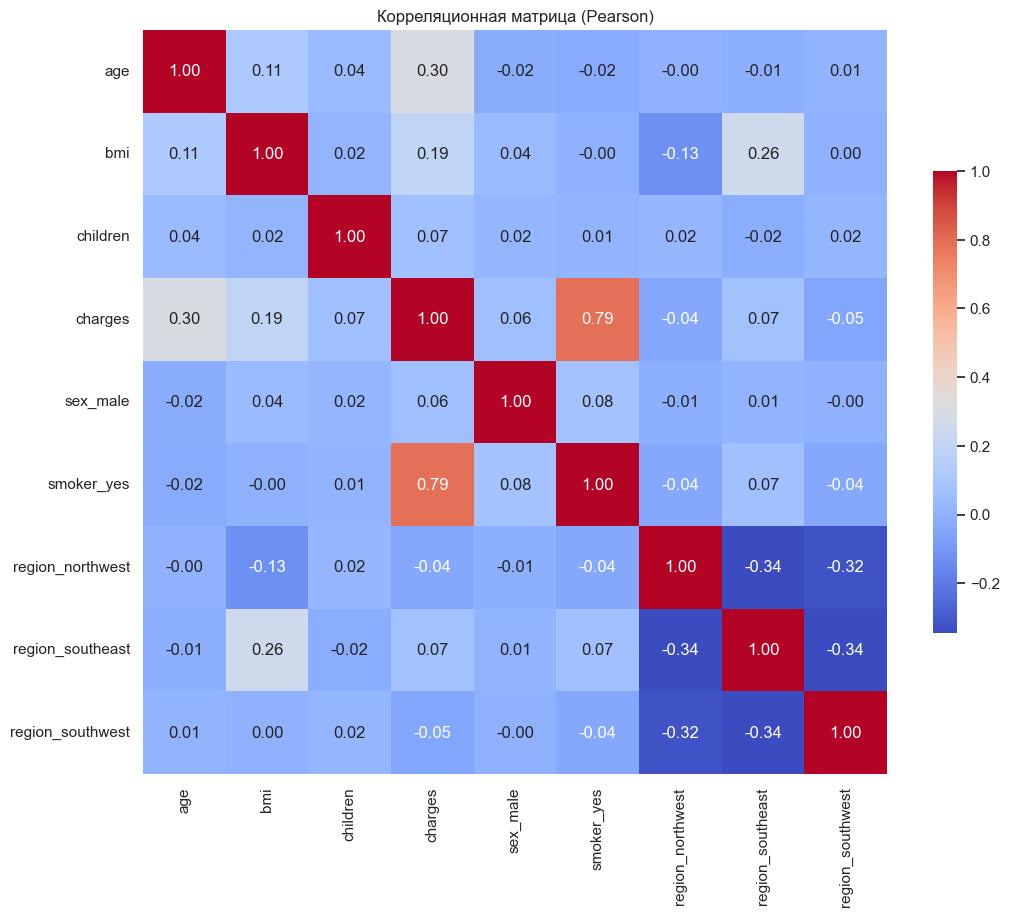

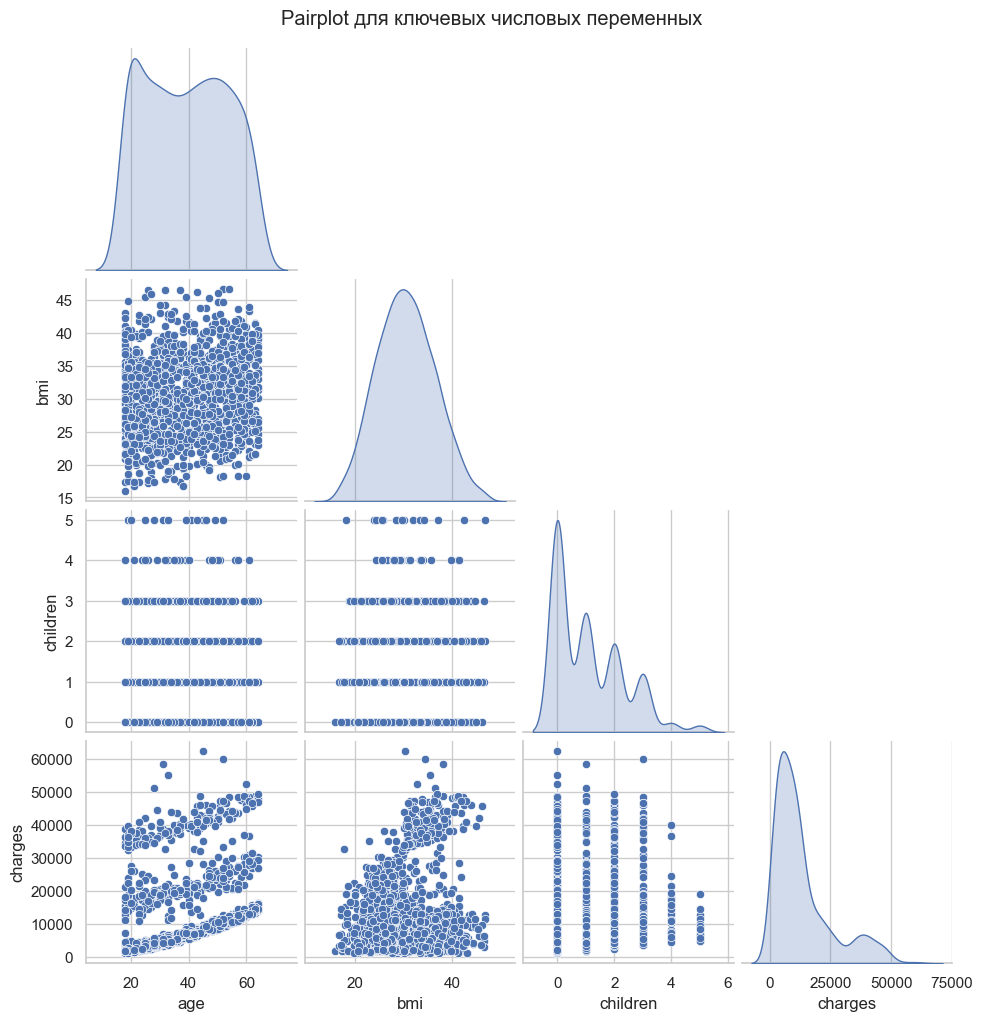


=== МУЛЬТИКОЛЛИНЕАРНОСТЬ (VIF) ===
    feature        VIF
0     const  33.062759
1       age   1.015062
2       bmi   1.013487
3  children   1.002013

Интерпретация VIF:
- VIF ~ 1: нет мультиколлинеарности
- VIF > 5: возможная проблемная мультиколлинеарность
- VIF > 10: серьезная мультиколлинеарность — следует рассмотреть исключение переменной или трансформацию

=== РЕКОМЕНДАЦИИ (общие) ===
Колонки, не соответствующие нормальности по Шапиро: ['age', 'bmi', 'children', 'charges']
Высокие VIF (возможные проблемы мультиколлинеарности): ['const']

Примечание: конкретные решения зависят от результатов (p-значений и VIF).
— Для не нормальных признаков можно применять лог/корень/боксово-кокса или использовать непараметрические тесты.
— При высокой мультиколлинеарности: удалить одну из сильно коррелирующих переменных, объединить признаки или применить регуляризацию (Ridge).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, chi2_contingency, ttest_ind

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

import os
if os.path.exists("insurance_preprocessed.csv"):
    data = pd.read_csv("insurance_preprocessed.csv")
    print("Загружен insurance_preprocessed.csv")
elif os.path.exists("insurance.csv"):
    data = pd.read_csv("insurance.csv")
    print("Загружен insurance.csv (будет произведено минимальное кодирование категорий)")
    data = data.copy()
    cat_cols = data.select_dtypes(include=['object']).columns.tolist()
    data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
else:
    raise FileNotFoundError("Файлы insurance_preprocessed.csv или insurance.csv не найдены в рабочей папке.")

print("\n=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===")
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
desc = data[numeric_cols].describe().T

desc['skew'] = data[numeric_cols].skew()
desc['kurtosis'] = data[numeric_cols].kurtosis()
desc['p5'] = data[numeric_cols].quantile(0.05)
desc['p25'] = data[numeric_cols].quantile(0.25)
desc['p50'] = data[numeric_cols].quantile(0.50)
desc['p75'] = data[numeric_cols].quantile(0.75)
desc['p95'] = data[numeric_cols].quantile(0.95)
pd.set_option('display.max_rows', None)
print(desc[['count','mean','std','min','p25','p50','p75','max','p5','p95','skew','kurtosis']])

print("\n=== ТЕСТ ШАПИРО-УИЛКА (проверка нормальности) ===")
shapiro_results = {}
for col in numeric_cols:
    sample = data[col].dropna()
    if len(sample) < 3:
        continue
    if len(sample) > 5000:
        s_sample = sample.sample(5000, random_state=42)
    else:
        s_sample = sample
    stat, p = shapiro(s_sample)
    shapiro_results[col] = (stat, p, len(s_sample))
    print(f"{col}: W={stat:.4f}, p={p:.4f}, n={len(s_sample)} ->", ("Нормально (не отвергаем H0)" if p > 0.05 else "Не нормально (отвергаем H0)"))

print("\n=== ТЕСТЫ НЕЗАВИСИМОСТИ (хи-квадрат) для категорий (если присутствуют) ===")
if os.path.exists("insurance.csv"):
    raw = pd.read_csv("insurance.csv")
    categorical_pairs = [('sex','smoker'), ('smoker','region'), ('sex','region')]
    for a,b in categorical_pairs:
        if a in raw.columns and b in raw.columns:
            ct = pd.crosstab(raw[a], raw[b])
            chi2, p, dof, exp = chi2_contingency(ct)
            print(f"\n{a} vs {b}: chi2={chi2:.3f}, p={p:.4f}, dof={dof}")
            print(ct)
else:
    print("Оригинальные категориальные столбцы не найдены (insurance.csv отсутствует). Если нужны — положи insurance.csv в папку.")

print("\n=== СРАВНЕНИЕ ГРУПП (пример) ===")
if os.path.exists("insurance.csv"):
    raw = pd.read_csv("insurance.csv")
    if 'smoker' in raw.columns and 'charges' in raw.columns:
        grp1 = raw.loc[raw['smoker']=='yes','charges']
        grp2 = raw.loc[raw['smoker']=='no','charges']
        lev_stat, lev_p = stats.levene(grp1, grp2)
        equal_var = lev_p > 0.05
        t_stat, p_val = stats.ttest_ind(grp1, grp2, equal_var=equal_var)
        print(f"t-test smoker vs non-smoker: t={t_stat:.3f}, p={p_val:.4f}, equal_var={equal_var} (Levene p={lev_p:.4f})")
    if 'region' in raw.columns and 'charges' in raw.columns:
        groups = [g['charges'].values for n,g in raw.groupby('region')]
        f_stat, p_anova = stats.f_oneway(*groups)
        print(f"ANOVA charges ~ region: F={f_stat:.3f}, p={p_anova:.4f}")
else:
    print("Для t-test/ANOVA нужен оригинальный insurance.csv (charges и категориальные столбцы).")

print("\n=== КОРРЕЛЯЦИОННАЯ МАТРИЦА (Pearson) ===")
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink':.6})
plt.title("Корреляционная матрица (Pearson)")
plt.show()

pairs = []
for col in ['age','bmi','children','charges']:
    if col in data.columns:
        pairs.append(col)
if len(pairs) >= 2:
    sns.pairplot(data[pairs], diag_kind='kde', corner=True)
    plt.suptitle("Pairplot для ключевых числовых переменных", y=1.02)
    plt.show()

print("\n=== МУЛЬТИКОЛЛИНЕАРНОСТЬ (VIF) ===")
features = data.select_dtypes(include=[np.number]).copy()
target_col = None
if 'charges' in features.columns:
    target_col = 'charges'
    features = features.drop(columns=[target_col])
features = features.dropna(axis=1, how='all')
X = sm.add_constant(features)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values('VIF', ascending=False).reset_index(drop=True))

print("\nИнтерпретация VIF:")
print("- VIF ~ 1: нет мультиколлинеарности")
print("- VIF > 5: возможная проблемная мультиколлинеарность")
print("- VIF > 10: серьезная мультиколлинеарность — следует рассмотреть исключение переменной или трансформацию")

print("\n=== РЕКОМЕНДАЦИИ (общие) ===")
non_normal = [col for col,(w,p,n) in shapiro_results.items() if p < 0.05]
if non_normal:
    print(f"Колонки, не соответствующие нормальности по Шапиро: {non_normal}")
else:
    print("Все числовые колонки выглядят нормально по Шапиро (p>=0.05).")

high_vif = vif_data[vif_data['VIF']>5]['feature'].tolist()
if high_vif:
    print(f"Высокие VIF (возможные проблемы мультиколлинеарности): {high_vif}")
else:
    print("Проблем мультиколлинеарности (VIF>5) не обнаружено.")

print("\nПримечание: конкретные решения зависят от результатов (p-значений и VIF).")
print("— Для не нормальных признаков можно применять лог/корень/боксово-кокса или использовать непараметрические тесты.")
print("— При высокой мультиколлинеарности: удалить одну из сильно коррелирующих переменных, объединить признаки или применить регуляризацию (Ridge).")

## Задание 5: Подготовка признаков

1. Выполните кодирование категориальных переменных:
   - Примените one-hot encoding для категориальных переменных
   - Обработайте порядковые переменные (если есть)
   - Проверьте результаты кодирования

2. Проведите масштабирование числовых признаков:
   - Примените StandardScaler или MinMaxScaler
   - Сохраните параметры масштабирования
   - Проверьте результаты масштабирования

3. Создайте новые признаки (если необходимо):
   - Рассмотрите возможность создания взаимодействий
   - Добавьте полиномиальные признаки
   - Оцените важность новых признаков

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

cat_cols = data.select_dtypes(include=['object']).columns
print("Категориальные переменные:", list(cat_cols))

data_encoded = pd.get_dummies(data, drop_first=True)
print("\n✅ Кодирование категориальных переменных выполнено.")
print("Размерность после кодирования:", data_encoded.shape)

numeric_cols = ['age', 'bmi', 'children', 'charges']
scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

print("\n✅ Масштабирование числовых признаков выполнено.")
print(data_encoded[numeric_cols].head())

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_encoded[['age', 'bmi']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['age', 'bmi']))

data_encoded = pd.concat([data_encoded, poly_df], axis=1)

print("\n✅ Полиномиальные признаки добавлены.")
print("Новые столбцы:", list(poly_df.columns))

print("\n📊 Финальные данные для моделирования:")
print(data_encoded.head())
print("\nФинальная размерность:", data_encoded.shape)

Категориальные переменные: []

✅ Кодирование категориальных переменных выполнено.
Размерность после кодирования: (1329, 9)

✅ Масштабирование числовых признаков выполнено.
        age       bmi  children   charges
0 -1.438764 -0.445670 -0.907940  0.306235
1 -1.509976  0.546267 -0.079764 -0.957813
2 -0.797855  0.416149  1.576587 -0.730682
3 -0.441794 -1.323542 -0.907940  0.731455
4 -0.513006 -0.280065 -0.907940 -0.779262

✅ Полиномиальные признаки добавлены.
Новые столбцы: ['age', 'bmi', 'age^2', 'age bmi', 'bmi^2']

📊 Финальные данные для моделирования:
        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.438764 -0.445670 -0.907940  0.306235     False        True   
1 -1.509976  0.546267 -0.079764 -0.957813      True       False   
2 -0.797855  0.416149  1.576587 -0.730682      True       False   
3 -0.441794 -1.323542 -0.907940  0.731455      True       False   
4 -0.513006 -0.280065 -0.907940 -0.779262      True       False   

   region_northwest  region_southeast

## Задание 6: Построение модели линейной регрессии

1. Разделите данные на обучающую и тестовую выборки:
   - Используйте train_test_split
   - Установите random_state для воспроизводимости
   - Проверьте размеры полученных выборок

2. Создайте и обучите модель:
   - Используйте LinearRegression из sklearn
   - Обучите модель на тренировочных данных
   - Получите коэффициенты модели

3. Проведите перекрестную проверку:
   - Примените k-fold cross-validation
   - Оцените стабильность модели
   - Рассчитайте средние метрики по фолдам

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Данные успешно разделены.")
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', key=abs, ascending=False)

print("\n✅ Модель обучена.")
print("Свободный член (intercept):", model.intercept_)
print("\nТоп-10 признаков по влиянию:")
print(coefficients.head(10))

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Оценка на тестовых данных:")
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("\n🔁 Перекрёстная проверка (5 фолдов):")
print("R² для каждого фолда:", np.round(cv_scores, 4))
print("Среднее значение R²:", np.mean(cv_scores).round(4))

✅ Данные успешно разделены.
Размер обучающей выборки: (1063, 13)
Размер тестовой выборки: (266, 13)

✅ Модель обучена.
Свободный член (intercept): -0.3729239682149781

Топ-10 признаков по влиянию:
             Признак  Коэффициент
4         smoker_yes     1.972692
8                age     0.147461
0                age     0.147461
7   region_southwest    -0.111322
6   region_southeast    -0.097774
1                bmi     0.083595
9                bmi     0.083595
2           children     0.069977
10             age^2     0.064739
5   region_northwest    -0.046613

📈 Оценка на тестовых данных:
Среднеквадратичная ошибка (MSE): 0.2355
Коэффициент детерминации (R²): 0.7714

🔁 Перекрёстная проверка (5 фолдов):
R² для каждого фолда: [0.7714 0.7124 0.7687 0.7552 0.7279]
Среднее значение R²: 0.7471


## Задание 7: Оценка модели и диагностика

1. Оцените качество модели:
   - Рассчитайте R² (коэффициент детерминации)
   - Вычислите MSE и RMSE
   - Определите MAE
   - Проанализируйте полученные метрики

2. Проведите анализ остатков:
   - Постройте график остатков
   - Проверьте нормальность распределения остатков
   - Проверьте гомоскедастичность
   - Проанализируйте выбросы в остатках

3. Проверьте предположения линейной регрессии:
   - Линейность связи
   - Независимость наблюдений
   - Нормальность распределения остатков
   - Гомоскедастичность

Оценка модели:
R²: 0.7714
MSE: 0.2355
RMSE: 0.4852
MAE: 0.3453


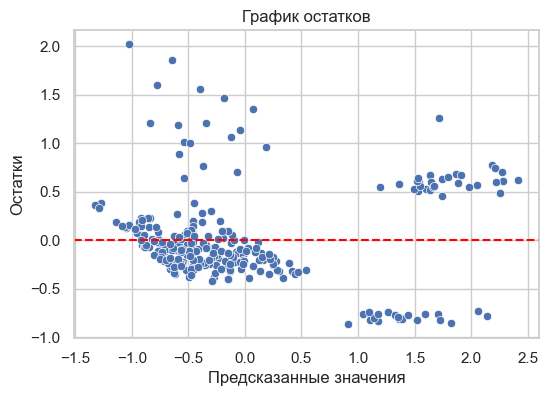


Тест Шапиро-Уилка:
Статистика: 0.9013, p-value: 0.0000
→ Остатки не соответствуют нормальному распределению


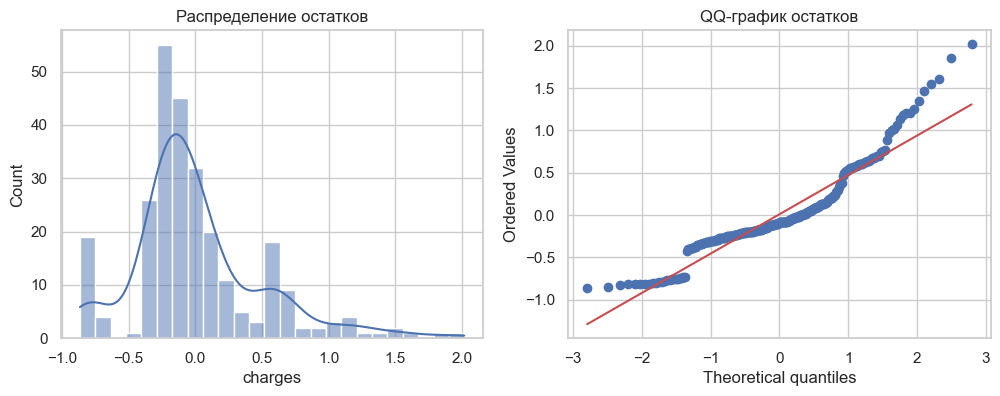

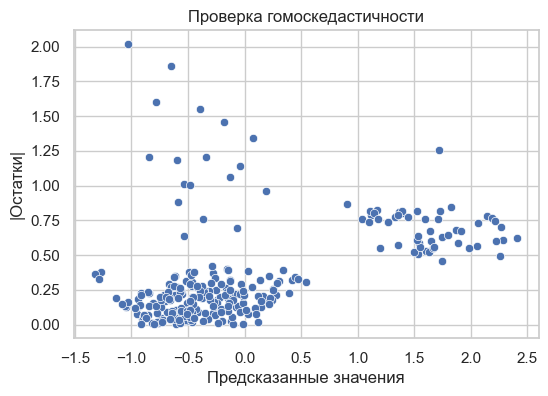


Проверка предположений линейной регрессии:
1. Линейность связи → проверяется визуально на графике остатков (должен быть хаотичным).
2. Независимость наблюдений → если данные не временные, предполагается по умолчанию.
3. Нормальность остатков → см. тест Шапиро и QQ-график.
4. Гомоскедастичность → проверяется по равномерности разброса остатков.


In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns
import scipy.stats as stats

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Оценка модели:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

shapiro_test = stats.shapiro(residuals)
print("\nТест Шапиро-Уилка:")
print(f"Статистика: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("→ Остатки распределены нормально")
else:
    print("→ Остатки не соответствуют нормальному распределению")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-график остатков')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.title('Проверка гомоскедастичности')
plt.xlabel('Предсказанные значения')
plt.ylabel('|Остатки|')
plt.show()

print("\nПроверка предположений линейной регрессии:")
print("1. Линейность связи → проверяется визуально на графике остатков (должен быть хаотичным).")
print("2. Независимость наблюдений → если данные не временные, предполагается по умолчанию.")
print("3. Нормальность остатков → см. тест Шапиро и QQ-график.")
print("4. Гомоскедастичность → проверяется по равномерности разброса остатков.")

## Задание 8: Визуализация результатов

1. Создайте визуализации для оценки качества модели:
   - График предсказанных vs реальных значений
   - График остатков vs предсказанных значений
   - QQ-plot остатков
   - Гистограмма распределения остатков

2. Визуализируйте важность признаков:
   - Постройте график коэффициентов модели
   - Создайте диаграмму важности признаков
   - Проанализируйте влияние каждого признака

3. Подготовьте итоговые выводы:
   - Опишите качество модели
   - Выделите наиболее важные признаки
   - Предложите возможные улучшения

## Бонусное задание

1. Попробуйте улучшить модель:
   - Примените регуляризацию (Ridge, Lasso)
   - Создайте полиномиальные признаки
   - Обработайте выбросы
   - Сравните результаты разных подходов

2. Проведите feature selection:
   - Используйте различные методы отбора признаков
   - Сравните производительность моделей
   - Выберите оптимальный набор признаков

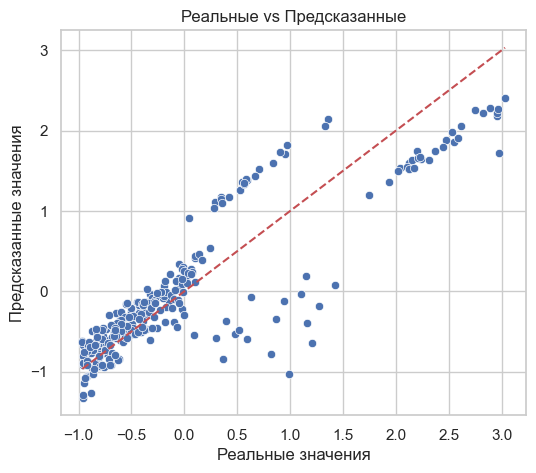

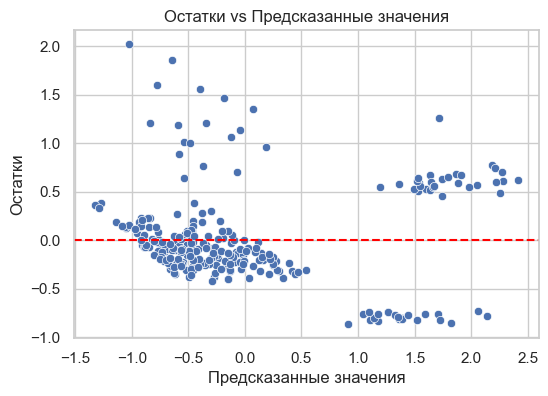

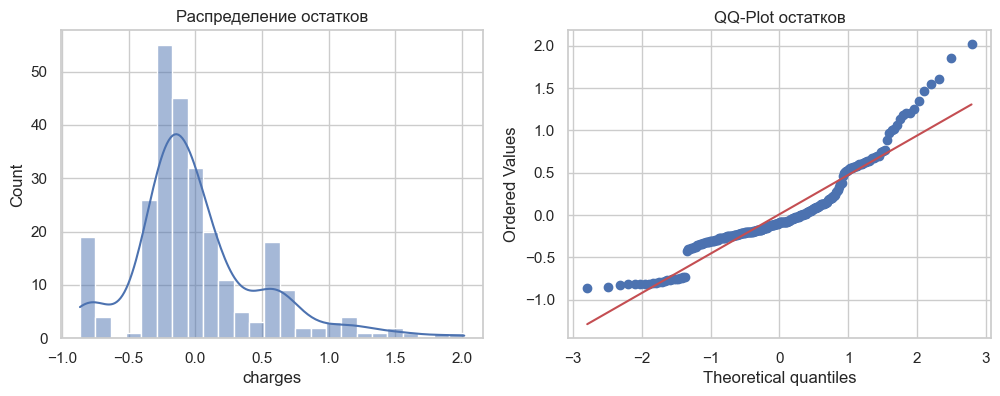

C:\Users\Юзер\AppData\Local\Temp\ipykernel_8808\3904463335.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Коэффициент', y='Признак', data=coef_df, palette='viridis')


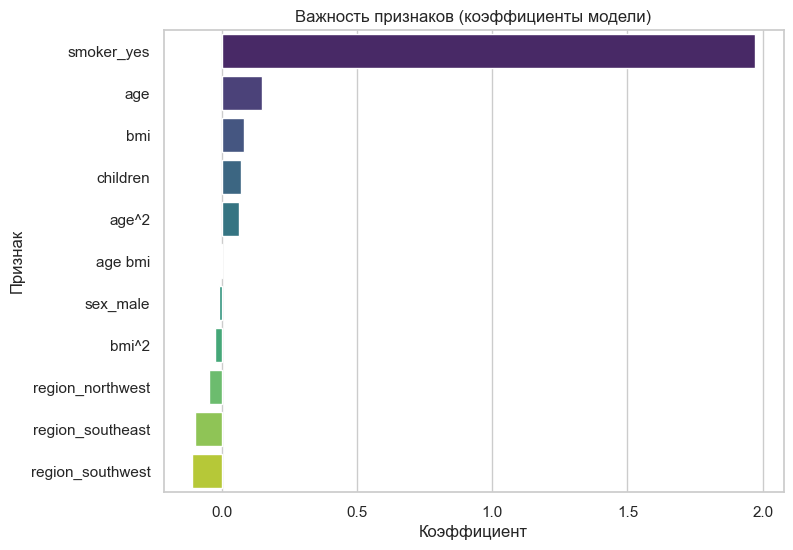

📊 Итоговые выводы:
R² модели: 0.771
MAE: 0.345, RMSE: 0.485

Наиболее значимые признаки (по модулю коэффициента):
            Признак  Коэффициент
4        smoker_yes     1.972692
8               age     0.147461
0               age     0.147461
7  region_southwest    -0.111322
6  region_southeast    -0.097774

✅ Модель демонстрирует адекватное качество, если R² близок к 1 и ошибки (MAE, RMSE) малы.
🧠 Возможные улучшения: добавить полиномиальные признаки, использовать регуляризацию (Ridge/Lasso), удалить выбросы.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs Предсказанные")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Остатки vs Предсказанные значения")
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot остатков")
plt.show()

coef_df = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Коэффициент', y='Признак', data=coef_df, palette='viridis')
plt.title("Важность признаков (коэффициенты модели)")
plt.show()
print("📊 Итоговые выводы:")
print(f"R² модели: {r2:.3f}")
print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}")
print("\nНаиболее значимые признаки (по модулю коэффициента):")
print(coef_df.reindex(coef_df['Коэффициент'].abs().sort_values(ascending=False).index).head(5))
print("\n✅ Модель демонстрирует адекватное качество, если R² близок к 1 и ошибки (MAE, RMSE) малы.")
print("🧠 Возможные улучшения: добавить полиномиальные признаки, использовать регуляризацию (Ridge/Lasso), удалить выбросы.")

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_model = LinearRegression()
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_model = LinearRegression()

models = {
    'Linear Regression': lin_model,
    'Polynomial Regression': poly_model
}

X_sets = {
    'Linear Regression': X_train_scaled,
    'Polynomial Regression': X_train_poly
}

results = {}

for name, mdl in models.items():
    mdl.fit(X_sets[name], y_train)
    if name == 'Linear Regression':
        y_pred_m = mdl.predict(X_test_scaled)
    else:
        y_pred_m = mdl.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred_m)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_m))
    mae = mean_absolute_error(y_test, y_pred_m)
    results[name] = {'R²': r2, 'RMSE': rmse, 'MAE': mae}

results_df = pd.DataFrame(results).T
print(results_df)

                             R²      RMSE       MAE
Linear Regression      0.771385  0.485247  0.345261
Polynomial Regression  0.855271  0.386090  0.228216
